# Modeling and Straight-Line Least-Squares Fit

## adapted from Rorres and Anton, <i>Applications of Linear Algebra, 3e</i> , 1984. pp 196-200.

<div style="border:2px solid black;">
<p></p>

$\textit{ Given n > 1 points ($x_1$, $y_1$), ($x_2$, $y_2$), ..., ($x_n$, $y_n$), not all lying on a vertical line, the least squares straight line fit to these points}$
<p></p>
<center>
$\textit{y = a + bx}$
</center>

$\textit{ has coefficients given by}$

<center>
$\textbf{v} \textit{= $(M^{T}M)^-1 M^{T}$} \textbf{y}$
</center>

$\textit{ where}$

<center>
$\textbf{v}$ = 
$\begin{bmatrix} a\\b \end{bmatrix}$, 
M = $\begin{bmatrix} 1&x_1 \\ 1&x_2 \\ ... \\ 1&x_n \end{bmatrix}$, and
$\textbf{y}$ =
$\begin{bmatrix} y_1\\y_2\\...\\y_n \end{bmatrix}$
</center>

<p></p>
</div>

EXAMPLE. Find the least squares straight line fit to the four points (0, 1), (1, 3), (2, 4), and (3, 4)

## sympy approach

In [2]:
from sympy import init_session
init_session()

IPython console for SymPy 1.8 (Python 3.9.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [3]:
M = Matrix([1, 0, 1, 1, 1, 2, 1, 3]).reshape(4, 2)
M

/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecation

⎡1  0⎤
⎢    ⎥
⎢1  1⎥
⎢    ⎥
⎢1  2⎥
⎢    ⎥
⎣1  3⎦

In [4]:
A = M.transpose() * M
A

⎡4  6 ⎤
⎢     ⎥
⎣6  14⎦

In [5]:
A.inv()

⎡7/10   -3/10⎤
⎢            ⎥
⎣-3/10   1/5 ⎦

In [6]:
A.inv() * M.transpose() * Matrix([1, 3, 4, 4])

⎡3/2⎤
⎢   ⎥
⎣ 1 ⎦

## numpy approach

In [7]:
import numpy as np

In [8]:
M = np.array([1, 0, 1, 1, 1, 2, 1, 3]).reshape(4, 2)
M

array([[1, 0],
       [1, 1],
       [1, 2],
       [1, 3]])

In [9]:
A = np.dot(M.T, M)
A

array([[ 4,  6],
       [ 6, 14]])

In [10]:
np.linalg.inv(A)

array([[ 0.7, -0.3],
       [-0.3,  0.2]])

In [11]:
np.dot(np.dot(np.linalg.inv(A), M.T), np.array([1, 3, 4, 4]))

array([1.5, 1. ])

# scipy approach

In [12]:
from scipy import stats

In [13]:
x = [0, 1, 2, 3]
y = [1, 3, 4, 4]

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [15]:
slope

/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecation

In [16]:
intercept

## matplotlib plot

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
x = np.array(x)

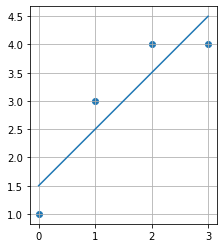

In [19]:
y = slope * x + intercept
plt.plot(x, y)
y = [1, 3, 4, 4]
plt.scatter(x, y)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()